In [1]:
import pandas as pd
df = pd.read_json("C:\\Users\\martinX1\\Downloads\\companies.jsons", lines = True)

In [2]:
df.head()

,description,html,industry
0,111WebHost.com offers budget and unlimited web...,"﻿<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 ...",Internet
1,We are a direct cash advance provider with fun...,﻿<!DOCTYPE html>\n\n<!--// OPEN HTML //-->\n<h...,Financial Services
2,Able Investigation & Enforcements are an estab...,"﻿<!DOCTYPE html>\n<html lang=""en-US"" prefix=""o...",Legal Services
3,For over two decades ABM has been known for it...,﻿<!DOCTYPE html>\n<!--[if lt IE 7 ]> <html cla...,Information Technology and Services
4,Additionally lets you easily create the best p...,"﻿\r\n<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4...",Internet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36947 entries, 0 to 36946
Data columns (total 3 columns):
description    36947 non-null object
html           36947 non-null object
industry       36947 non-null object
dtypes: object(3)
memory usage: 866.0+ KB


In [4]:
import re 
def clean_str(string):
    string = re.sub(r'[^a-zA-Z ]+', '', string)
    string = re.sub( '\s+', ' ', string )
    return string.strip().lower()

In [5]:
from bs4 import BeautifulSoup
df['html2text'] = df['html'].apply(lambda x: clean_str(BeautifulSoup(x, "lxml").get_text()))
df['description'] = df['description'].apply(lambda x: clean_str(x))

In [6]:
df['len_description'] = df['description'].str.len()
df['len_html'] = df['html'].str.len()
df['len_html2text'] = df['html2text'].str.len()

In [7]:
df[['len_description','len_html','len_html2text']].head()

,len_description,len_html,len_html2text
0,598,20508,3254
1,323,46165,18637
2,681,31989,11663
3,1125,13352,1067
4,160,423,12


In [8]:
df[['len_description','len_html','len_html2text']].lt(2).sum(axis=0)

len_description    142
len_html             0
len_html2text      638
dtype: int64

In [9]:
df[df['len_description']  < 3 ].sort_values(by=['len_description'], ascending=False)[['html2text','description','industry']].head(10)

,html2text,description,industry
6514,android ios iphoneipadfunction d w c wc wc pus...,it,Computer Software
12097,documentreadyfunctionnewsinnerfadeanimationtyp...,dd,Graphic Design
19856,kentucky department of education homepagedocum...,na,Education Management
1097,imgpng behavior urljspngbehaviorhtc searchtext...,pr,Information Technology and Services
19857,kentucky department of education homepagedocum...,na,Education Management
24951,cdata jquery v c jquery foundation inc jqueryo...,it,Information Technology and Services
29965,functionisogramigoogleanalyticsobjectririrfunc...,rd,Computer Software
18880,carbackrudocumentwritescript srchttpparkingcre...,c,Internet
24993,northside realty raleigh ncclick here to see m...,x,Real Estate
24807,var t jquerynoconflict tdocumentreadyfunction ...,c,Construction


In [10]:
df[df['len_html2text']  < 15 ].sort_values(by=['len_html2text'], ascending=False)[['html2text','description','industry']].head(10)

,html2text,description,industry
29441,youth for life,providing real answers for real problems offer...,"Health, Wellness and Fitness"
20213,stepchange kft,highly collaborative teamoriented approach to ...,Management Consulting
18933,kol consulting,vba excel automation incl automation of ms off...,Management Consulting
18573,kyle frederick,helpful advice from a positive realtor team se...,Real Estate
35886,e loft a ok ok,baysouth inc is a startup which has finished t...,Internet
35070,mytampamovecom,i love what i do and it shows i appreciate you...,Real Estate
11343,httprhhondacom,as a corporate citizen in the richmond hill on...,Automotive
1725,wwwinsglobalcl,corretaje de seguros de vida y generalesasesor...,Information Technology and Services
34747,skjervum media,consulting web development web hosting domain ...,Information Technology and Services
13312,luxcarsleasing,established in in luxembourg lux cars leasing ...,Automotive


In [12]:
df['num_words_description'] = df.description.apply(lambda x : len(x.split()))
df['num_words_html2text'] = df.html2text.apply(lambda x : len(x.split()))

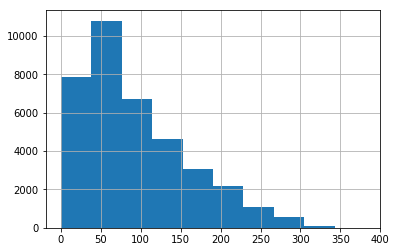

In [13]:
df['num_words_description'].hist()

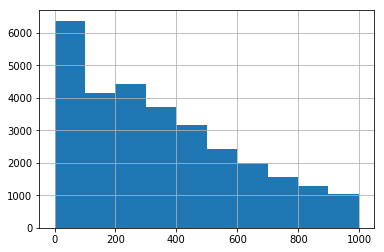

In [14]:
df[df['num_words_html2text']  < 1000]['num_words_html2text'].hist()

In [15]:
df['industry'].value_counts()

Information Technology and Services     2911
Marketing and Advertising               2415
Internet                                1457
Construction                            1373
Management Consulting                   1340
Real Estate                             1180
Financial Services                      1055
Computer Software                        945
Health, Wellness and Fitness             899
Nonprofit Organization Management        872
Education Management                     834
Design                                   829
Hospital & Health Care                   740
Retail                                   732
Automotive                               655
Staffing and Recruiting                  635
Professional Training & Coaching         591
Law Practice                             580
Accounting                               576
Food & Beverages                         552
Entertainment                            551
Human Resources                          546
Architectu

imbalanced data

undersampling or oversampling should be tested

In [16]:
df['industry_id'] = df['industry'].factorize()[0]

In [17]:
df_new = df[['industry_id','industry','len_description','len_html2text','num_words_description','num_words_html2text','description','html2text']]

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36947 entries, 0 to 36946
Data columns (total 8 columns):
industry_id              36947 non-null int64
industry                 36947 non-null object
len_description          36947 non-null int64
len_html2text            36947 non-null int64
num_words_description    36947 non-null int64
num_words_html2text      36947 non-null int64
description              36947 non-null object
html2text                36947 non-null object
dtypes: int64(5), object(3)
memory usage: 2.3+ MB


In [19]:
df_new.describe()

,industry_id,len_description,len_html2text,num_words_description,num_words_html2text
count,36947.000000,36947.000000,3.694700e+04,36947.000000,36947.000000
mean,25.172436,618.874712,9.656588e+03,92.831434,888.910169
std,18.056125,439.861515,2.512899e+04,66.932018,3737.040759
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,11.000000,287.000000,1.933000e+03,42.000000,167.000000
50%,22.000000,507.000000,4.543000e+03,76.000000,393.000000
75%,40.000000,879.000000,9.516000e+03,132.000000,788.000000
max,64.000000,2267.000000,1.044730e+06,381.000000,239912.000000


In [20]:
df_new.to_pickle("./preprocessed_data.pkl")